<a href="https://colab.research.google.com/github/mrcrdg/jupyter_set/blob/master/Cross_Validation_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cross Validation

## k-fold Cross Validation

### Toy example:

In [5]:
from numpy import array
from sklearn.model_selection import KFold

Create the sample data


In [6]:
data = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

Create the `KFold`

In [7]:
kfold = KFold(n_splits=3)

List the content of each Fold:

In [8]:
for train, test in kfold.split(data):
  print("train: {}, test: {}".format(data[train], data[test]))

train: [0.3 0.4 0.5 0.6], test: [0.1 0.2]
train: [0.1 0.2 0.5 0.6], test: [0.3 0.4]
train: [0.1 0.2 0.3 0.4], test: [0.5 0.6]


### A more detailed example:

First we will download the [Sonar dataset](https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)) which classifies sonar data into rocks and mines.

In [9]:
! wget -c https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data

--2020-11-26 03:11:57--  https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87776 (86K) [application/x-httpd-php]
Saving to: ‘sonar.all-data’

sonar.all-data      100%[===================>]  85.72K  --.-KB/s    in 0.1s    

2020-11-26 03:11:58 (659 KB/s) - ‘sonar.all-data’ saved [87776/87776]



In [10]:
!head -10 sonar.all-data

0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.

Perform the required imports

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

Read and rearrange data

In [12]:
sonar_dataset = pd.read_csv("sonar.all-data")
sonar_X = sonar_dataset.iloc[:,:-1].values
sonar_y = sonar_dataset.iloc[:,-1:].values

In [13]:
sonar_X.shape

(207, 60)

Split data into train and test sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(sonar_X, sonar_y, 
                                                    random_state=2, 
                                                    test_size=.3)

*Create* the 3-fold validation

In [15]:
k_fold = KFold(3)

lr_model = LogisticRegression()

models = []

Now train the classifier on each partition

In [16]:
for k, (train, validation) in enumerate(k_fold.split(X_train, y_train)):
    lr_model = LogisticRegression()
    lr_model.fit(X_train[train], y_train[train].ravel())
    models.append(lr_model)
    print("[fold {}], score on validation: {:.5f}, score on test: {:.5f}, ". 
          format(k, lr_model.score(X_train[validation], y_train[validation]),
                 lr_model.score(X_test, y_test)))

[fold 0], score on validation: 0.81250, score on test: 0.82540, 
[fold 1], score on validation: 0.66667, score on test: 0.76190, 
[fold 2], score on validation: 0.75000, score on test: 0.68254, 


## Leave One Out Cross Validation - LOOCV

### Toy example:

In [17]:
from numpy import array
from sklearn.model_selection import LeaveOneOut

Create the sample data


In [18]:
data = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

Create the `LOOCV`

In [19]:
loocv = LeaveOneOut()

List the content of each Fold:

In [20]:
for train, test in loocv.split(data):
  print("train: {}, test: {}".format(data[train], data[test]))

train: [0.2 0.3 0.4 0.5 0.6], test: [0.1]
train: [0.1 0.3 0.4 0.5 0.6], test: [0.2]
train: [0.1 0.2 0.4 0.5 0.6], test: [0.3]
train: [0.1 0.2 0.3 0.5 0.6], test: [0.4]
train: [0.1 0.2 0.3 0.4 0.6], test: [0.5]
train: [0.1 0.2 0.3 0.4 0.5], test: [0.6]


### A more detailed example:

Continue using the [Sonar dataset](https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks))

Perform the required imports

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut

Read and rearrange data

In [22]:
sonar_dataset = pd.read_csv("sonar.all-data")
sonar_X = sonar_dataset.iloc[:,:-1].values
sonar_y = sonar_dataset.iloc[:,-1:].values

Split data into train and test sets

In [23]:
X_train, X_test, y_train, y_test = train_test_split(sonar_X, sonar_y, 
                                                    random_state=2, 
                                                    test_size=.3)

Create the N-fold validation

In [24]:
loocv = LeaveOneOut()

lr_model = LogisticRegression()

Now train the classifier on each partition

In [25]:
for k, (train, validation) in enumerate(loocv.split(X_train, y_train)):
    lr_model.fit(X_train[train], y_train[train].ravel())
    print("[fold {}], score on validation: {:.5f}, score on test: {:.5f}, ". 
          format(k, lr_model.score(X_train[validation], y_train[validation]),
                 lr_model.score(X_test, y_test)))

[fold 0], score on validation: 1.00000, score on test: 0.79365, 
[fold 1], score on validation: 1.00000, score on test: 0.77778, 
[fold 2], score on validation: 1.00000, score on test: 0.77778, 
[fold 3], score on validation: 1.00000, score on test: 0.77778, 
[fold 4], score on validation: 1.00000, score on test: 0.77778, 
[fold 5], score on validation: 1.00000, score on test: 0.79365, 
[fold 6], score on validation: 1.00000, score on test: 0.77778, 
[fold 7], score on validation: 1.00000, score on test: 0.77778, 
[fold 8], score on validation: 1.00000, score on test: 0.77778, 
[fold 9], score on validation: 1.00000, score on test: 0.77778, 
[fold 10], score on validation: 1.00000, score on test: 0.79365, 
[fold 11], score on validation: 1.00000, score on test: 0.77778, 
[fold 12], score on validation: 1.00000, score on test: 0.79365, 
[fold 13], score on validation: 0.00000, score on test: 0.77778, 
[fold 14], score on validation: 1.00000, score on test: 0.77778, 
[fold 15], score on 

# Exercise


The Banknote Dataset involves predicting whether a given banknote is authentic given a number of measures taken from a photograph.

It is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 1,372 observations with 4 input variables and 1 output variable. For more information, check [this link](http://archive.ics.uci.edu/ml/datasets/banknote+authentication).

## Download and read the data

In [26]:
!wget -c http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt

--2020-11-26 03:12:01--  http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46400 (45K) [application/x-httpd-php]
Saving to: ‘data_banknote_authentication.txt’

data_banknote_authe 100%[===================>]  45.31K  --.-KB/s    in 0.1s    

2020-11-26 03:12:01 (357 KB/s) - ‘data_banknote_authentication.txt’ saved [46400/46400]



In [27]:
!head -10 data_banknote_authentication.txt

3.6216,8.6661,-2.8073,-0.44699,0
4.5459,8.1674,-2.4586,-1.4621,0
3.866,-2.6383,1.9242,0.10645,0
3.4566,9.5228,-4.0112,-3.5944,0
0.32924,-4.4552,4.5718,-0.9888,0
4.3684,9.6718,-3.9606,-3.1625,0
3.5912,3.0129,0.72888,0.56421,0
2.0922,-6.81,8.4636,-0.60216,0
3.2032,5.7588,-0.75345,-0.61251,0
1.5356,9.1772,-2.2718,-0.73535,0


In [28]:
import pandas as pd

In [29]:
banknote_dataset = pd.read_csv("data_banknote_authentication.txt")

## Tasks

1. Create Naive Bayes and Logistic Regression Classifiers;
1. Perform Cross Validations on Both models to select the best one;
1. Create boxplots to show the variation of the k-fold models:
  * Check the [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) and [`cross_val_predict`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html#sklearn.model_selection.cross_val_predict) methods
1. Save the best Model using the Pickle Python Library (see [this link](https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/) for reference)

Attribute Information:

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)



In [30]:
banknote_dataset

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.16740,-2.4586,-1.46210,0
1,3.86600,-2.63830,1.9242,0.10645,0
2,3.45660,9.52280,-4.0112,-3.59440,0
3,0.32924,-4.45520,4.5718,-0.98880,0
4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1


In [31]:
banknote_dataset.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']

In [32]:
banknote_dataset.head(2)

,variance,skewness,curtosis,entropy,class
0,4.5459,8.1674,-2.4586,-1.46210,0
1,3.8660,-2.6383,1.9242,0.10645,0


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [34]:
# Definir Y e X, remover o 'gabarito'
y = banknote_dataset.iloc[:,-1]
X = banknote_dataset[['variance', 'skewness', 'curtosis', 'entropy']]

In [35]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1366    1
1367    1
1368    1
1369    1
1370    1
Name: class, Length: 1371, dtype: int64

In [36]:
X

,variance,skewness,curtosis,entropy
0,4.54590,8.16740,-2.4586,-1.46210
1,3.86600,-2.63830,1.9242,0.10645
2,3.45660,9.52280,-4.0112,-3.59440
3,0.32924,-4.45520,4.5718,-0.98880
4,4.36840,9.67180,-3.9606,-3.16250
...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949
1367,-1.38870,-4.87730,6.4774,0.34179
1368,-3.75030,-13.45860,17.5932,-2.77710
1369,-3.56370,-8.38270,12.3930,-1.28230


In [37]:
# train test: 80 % - 20 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)

In [38]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

1096
1096
275
275


### Logistic Regression

In [39]:
df_logreg = LogisticRegression().fit(X_train, y_train)

Y_logreg_pred = df_logreg.predict(X_test)

#### Metrics

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [41]:
acc = accuracy_score(y_test, Y_logreg_pred)
print(f"The accuracy LogReg is: {round(acc,3)*100}%")

f1 = f1_score(y_test, Y_logreg_pred)
print(f"The f1 LogReg is: {round(f1,3)*100}%")

precision = precision_score(y_test, Y_logreg_pred)
print(f"The precision LogReg is: {round(precision,3)*100}%")

recall = recall_score(y_test, Y_logreg_pred)
print(f"The recall LogReg is: {round(recall,3)*100}%")

The accuracy LogReg is: 98.5%
The f1 LogReg is: 98.4%
The precision LogReg is: 96.8%
The recall LogReg is: 100.0%


In [42]:
# Matriz de confusão LogReg
cnf_matrix_log = confusion_matrix(y_test, Y_logreg_pred)
print(cnf_matrix_log)

[[150   4]
 [  0 121]]


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.1, 'Matriz de confusão Logistic Regression\n')

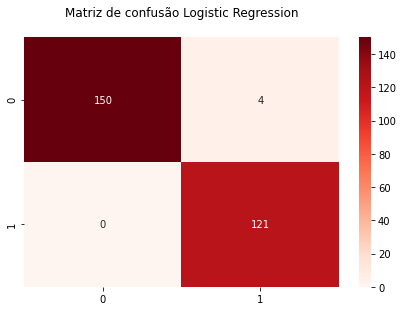

In [44]:
sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Matriz de confusão Logistic Regression\n', y=1.1)

### Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB

In [46]:
df_gaussian = GaussianNB().fit(X_train, y_train)

Y_gaussian_pred = df_gaussian.predict(X_test)

#### Metric

In [47]:
acc = accuracy_score(y_test, Y_gaussian_pred)
print(f"The accuracy Naive Bayes is: {round(acc,3)*100}%")

precision = precision_score(y_test, Y_gaussian_pred)
print(f"The precision Naive Bayes is: {round(precision,3)*100}%")

f1 = f1_score(y_test, Y_gaussian_pred)
print(f"The f1 Naive Bayes is: {round(f1,3)*100}%")

recall = recall_score(y_test, Y_gaussian_pred)
print(f"The recall Naive Bayes is: {round(recall,3)*100}%")

The accuracy Naive Bayes is: 85.1%
The precision Naive Bayes is: 87.0%
The f1 Naive Bayes is: 82.1%
The recall Naive Bayes is: 77.7%


In [48]:
# Matriz de confusão LogReg
cnf_matrix_gau = confusion_matrix(y_test, Y_gaussian_pred)
print(cnf_matrix_gau)

[[140  14]
 [ 27  94]]


Text(0.5, 1.1, 'Matriz de confusão Naive Bayes\n')

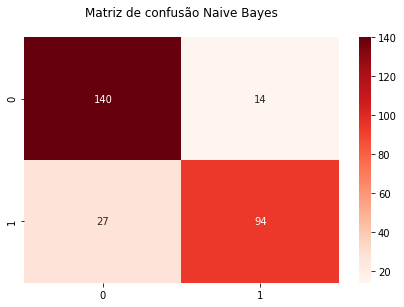

In [49]:
sns.heatmap(pd.DataFrame(cnf_matrix_gau), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Matriz de confusão Naive Bayes\n', y=1.1)

## Curva ROC

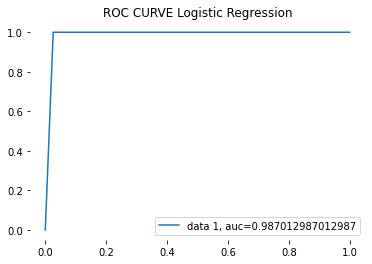

The AUC ROC Curve is: 98.7%


In [50]:
# Modelo Logistico

fpr, tpr, _ = roc_curve(y_test, Y_logreg_pred)
auc = roc_auc_score(y_test, Y_logreg_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.box(False)
plt.title ('ROC CURVE Logistic Regression')
plt.show()

print(f"The AUC ROC Curve is: {round(auc,3)*100}%")

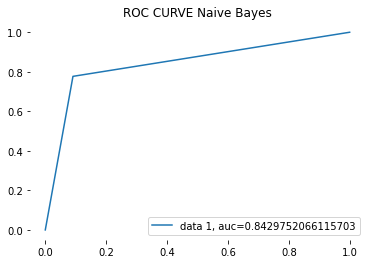

The AUC ROC Curve is: 84.3%


In [51]:
# Modelo Gaussiano

fpr, tpr, _ = roc_curve(y_test, Y_gaussian_pred)
auc = roc_auc_score(y_test, Y_gaussian_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.box(False)
plt.title ('ROC CURVE Naive Bayes')
plt.show()

print(f"The AUC ROC Curve is: {round(auc,3)*100}%")

## K-Fold Cross Validation


*Create* the 3-fold validation

In [52]:
k_fold = KFold(5)

lr_model = LogisticRegression()

models = []

In [53]:
# o método desta célula não deu certo, porém ele é equivalente ao sklearn.model_selection.cross_validate()
for k, (train, validation) in enumerate(k_fold.split(X_train, y_train)):
  lr_model = LogisticRegression()
  lr_model.fit(X_train, y_train.ravel())
  models.append(lr_model)
  print("[fold {}], score on validation: {:.5f}, score on test: {:.5f}, ".format(k, lr_model.score(X_train, y_train), lr_model.score(X_test, y_test)))

[fold 0], score on validation: 0.99270, score on test: 0.98545, 
[fold 1], score on validation: 0.99270, score on test: 0.98545, 
[fold 2], score on validation: 0.99270, score on test: 0.98545, 
[fold 3], score on validation: 0.99270, score on test: 0.98545, 
[fold 4], score on validation: 0.99270, score on test: 0.98545, 


In [54]:
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate

## Metrics

In [55]:
## Logistic Regression

In [56]:
logreg = LogisticRegression()
scores_log = cross_val_score(logreg, X, y, cv=10, scoring = "accuracy")
print("Scores:", scores_log)
print("Mean:", scores_log.mean())
print("Standard Deviation:", scores_log.std())

Scores: [0.98550725 0.99270073 0.98540146 0.99270073 0.97080292 0.99270073
 1.         1.         0.99270073 0.98540146]
Mean: 0.9897916005500897
Standard Deviation: 0.008122483210514052


In [57]:
logreg = LogisticRegression()
predict = cross_val_predict(logreg, X, y, cv=10, method = "predict")
print("Predictions:", predict)
print("Mean:", predict.mean())
print("Standard Deviation:", predict.std())

Predictions: [0 0 0 ... 1 1 1]
Mean: 0.44930707512764406
Standard Deviation: 0.4974235894767012


In [58]:
logreg = LogisticRegression()
validation = cross_validate(logreg, X, y, cv=10, scoring = "accuracy",  return_train_score=True)
print("Predictions:", validation)

Predictions: {'fit_time': array([0.01244211, 0.0075922 , 0.00748754, 0.00848913, 0.00762391,
       0.01129746, 0.01027274, 0.00830007, 0.00810385, 0.00784492]), 'score_time': array([0.00107813, 0.00099158, 0.00097299, 0.00094914, 0.0009346 ,
       0.00102568, 0.00149107, 0.00104141, 0.0009973 , 0.00100422]), 'test_score': array([0.98550725, 0.99270073, 0.98540146, 0.99270073, 0.97080292,
       0.99270073, 1.        , 1.        , 0.99270073, 0.98540146]), 'train_score': array([0.99107867, 0.99027553, 0.99027553, 0.99027553, 0.99351702,
       0.98946515, 0.98865478, 0.98865478, 0.99027553, 0.99027553])}


In [59]:
## GaussianNB

In [60]:
gaussian = GaussianNB()
scores_gau = cross_val_score(gaussian, X, y, cv=10, scoring = "accuracy")
print("Scores:", scores_gau)
print("Mean:", scores_gau.mean())
print("Standard Deviation:", scores_gau.std())

Scores: [0.85507246 0.86861314 0.7810219  0.83211679 0.80291971 0.80291971
 0.88321168 0.88321168 0.89051095 0.81021898]
Mean: 0.8409816989315562
Standard Deviation: 0.03807817591574567


In [61]:
predict = cross_val_predict(gaussian, X, y, cv=10, method = "predict")
print("Predictions:", predict)
print("Mean:", predict.mean())
print("Standard Deviation:", predict.std())

Predictions: [0 0 0 ... 1 1 1]
Mean: 0.41867250182348653
Standard Deviation: 0.49334150245073566


In [62]:
validation = cross_validate(gaussian, X, y, cv=10, scoring = "accuracy",  return_train_score=True)
print("Predictions:", validation)

Predictions: {'fit_time': array([0.00374961, 0.00187182, 0.00197339, 0.00171208, 0.00167394,
       0.00170398, 0.00166035, 0.00166988, 0.00168467, 0.00167441]), 'score_time': array([0.00563931, 0.00099897, 0.00096297, 0.00092769, 0.00093746,
       0.00093031, 0.00093126, 0.00097251, 0.00092959, 0.00092411]), 'test_score': array([0.85507246, 0.86861314, 0.7810219 , 0.83211679, 0.80291971,
       0.80291971, 0.88321168, 0.88321168, 0.89051095, 0.81021898]), 'train_score': array([0.837794  , 0.83873582, 0.84197731, 0.84440843, 0.84440843,
       0.84116694, 0.83792545, 0.83873582, 0.84116694, 0.8452188 ])}


## Boxplot of k-fold models

Create boxplots to show the variation of the k-fold models:
- Check the cross_val_score and cross_val_predict methods

In [63]:
from sklearn.datasets import make_classification
from scipy.stats import sem
from numpy import mean
from numpy import std
from matplotlib import pyplot

mean=0.9898 se=0.003
mean=0.8410 se=0.013


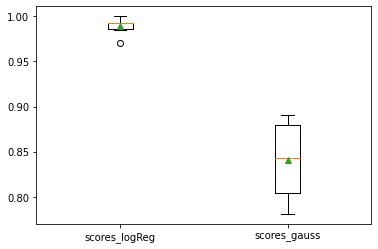

In [65]:
scores = [scores_log, scores_gau]
scores_labels = ['scores_logReg', 'scores_gauss']
for r in scores:
	print('mean=%.4f se=%.3f' % (mean(r), sem(r)))

# plot the results
pyplot.boxplot(scores, labels=[str(r) for r in scores_labels], showmeans=True)
pyplot.show()

## Save with Pickle

Save the best Model using the Pickle Python Library (see this link for reference)

In [66]:
import pickle

In [69]:
# save the model Logistic Regression to disk
filename = 'finalized_model.sav'
pickle.dump(df_logreg, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9854545454545455
